### **Importing Python Libraries**

In [1]:
!pip install nltk
!python -m nltk.downloader wordnet

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


In [3]:
!pip install tensorflow

     ---------------------------------------- 0.0/46.1 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.1 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.1 kB ? eta -:--:--
     -------------------------------------- 46.1/46.1 kB 329.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 660.6 kB/s eta 0:09:31
   ---------------------------------------- 0.1/377.0 MB 585.1 kB/s eta 0:10:45
   ---------------------------------------- 0.2/377.0 MB 657.6 kB/s eta 0:09:33
   ---------------------------------------- 0.2/377.0 MB 737.3 kB/s eta 0:08:32
   ---------------------------------------- 0.2/377.0 MB 655.1 kB/s eta 0:09:36
   ---------------------------------------- 0.2/377.0 MB 655.6 kB/s eta 0:09:35
   ------

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import matplotlib.cm as cm
#from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **Loading the data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/Twitter_data.csv", encoding = "ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

### **Exploratory data analysis**

In [ ]:
data.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.tail()

,label,time,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [ ]:
data.shape

(1599999, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
data.isnull().sum()

label       0
time        0
date        0
query       0
username    0
text        0
dtype: int64

### **Data Preparation**

In [ ]:
#Selecting the text and label coloumn
data=data[['text','label']]

In [ ]:
#Assigning 1 to Positive sentment 4
data['label'][data['label']==4]=1

In [ ]:
#Separating positive and negative tweets
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [ ]:
#taking one fourth data so we can run on our machine easily
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [ ]:
data_pos.shape

(20000, 2)

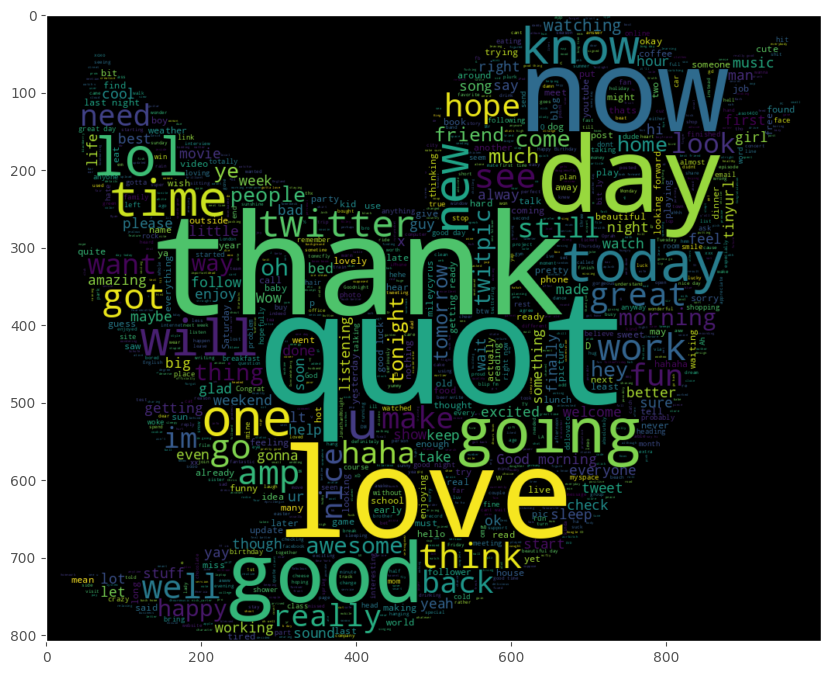

In [ ]:
#Word cloud for positive word
# Load the Twitter bird mask image
twitter_mask = np.array(Image.open("twitter_mask.png"))

from wordcloud import WordCloud
plt.figure(figsize=(10,10))
wc=WordCloud(mask = twitter_mask , max_words=2000,width=1600,height=800).generate(" ".join(data_pos.text))
plt.imshow(wc, interpolation='bilinear')
plt.grid()

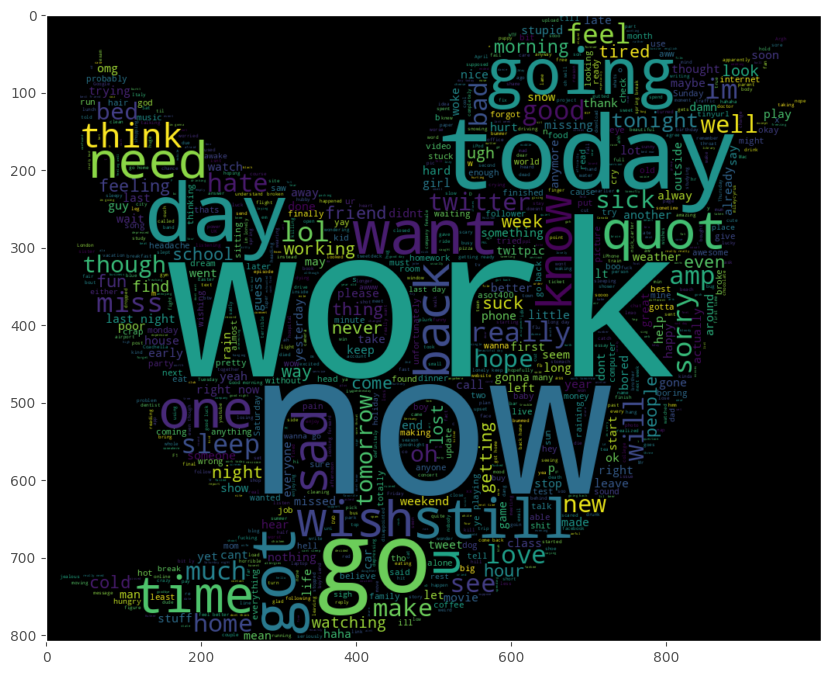

In [ ]:
#Word cloud for negative word
# Load the Twitter bird mask image
twitter_mask = np.array(Image.open("twitter_mask.png"))
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
wc=WordCloud(mask = twitter_mask, max_words=2000,width=1600,height=800).generate(" ".join(data_neg.text))
plt.imshow(wc, interpolation='bilinear')
plt.grid()

In [ ]:
#Combining positive and negative tweets
data = pd.concat([data_pos, data_neg])

In [ ]:
#Making statement text in lower case
data['text']=data['text'].str.lower()

In [ ]:
data['text'].head()

799999         i love @health4uandpets u guys r the best!! 
800000    im meeting up with one of my besties tonight! ...
800001    @darealsunisakim thanks for the twitter add, s...
800002    being sick can be really cheap when it hurts t...
800003      @lovesbrooklyn2 he has that effect on everyone 
Name: text, dtype: object

In [ ]:
# Listing Stop words of english
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
# Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [ ]:
#Cleaning and removing punctuations
punctuations_list = string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].head()

799999                   love health4uandpets u guys r best
800000    im meeting one besties tonight cant wait  girl...
800001    darealsunisakim thanks twitter add sunisa got ...
800002    sick really cheap hurts much eat real food plu...
800003                       lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [ ]:
#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].head()

799999                   love health4uandpets u guys r best
800000    im meting one besties tonight cant wait girl talk
800001    darealsunisakim thanks twiter ad sunisa got me...
800002    sick realy cheap hurts much eat real fod plus ...
800003                         lovesbroklyn2 efect everyone
Name: text, dtype: object

In [ ]:
#Cleaning and removing email
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].head()

799999                   love health4uandpets u guys r best
800000    im meting one besties tonight cant wait girl talk
800001    darealsunisakim thanks twiter ad sunisa got me...
800002    sick realy cheap hurts much eat real fod plus ...
800003                         lovesbroklyn2 efect everyone
Name: text, dtype: object

In [ ]:
#Cleaning and removing URL's
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].head()

799999                   love health4uandpets u guys r best
800000    im meting one besties tonight cant wait girl talk
800001    darealsunisakim thanks twiter ad sunisa got me...
800002    sick realy cheap hurts much eat real fod plus ...
800003                         lovesbroklyn2 efect everyone
Name: text, dtype: object

In [ ]:
#Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].head()

799999                    love healthuandpets u guys r best
800000    im meting one besties tonight cant wait girl talk
800001    darealsunisakim thanks twiter ad sunisa got me...
800002    sick realy cheap hurts much eat real fod plus ...
800003                          lovesbroklyn efect everyone
Name: text, dtype: object

In [ ]:
#data['text'] = data['text'].astype(str)

In [ ]:
# Getting tokenization of tweet text
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [ ]:
#Applying Stemming
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Applying Lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

### **Separating input feature and label**

In [ ]:
X=data.text
y=data.label

**Preparing the input features for training**



*   We converting the text words into arrays form.
*   Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets.





In [ ]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

As we can see that there total 40000 tweets and the number words/features are 500

In [ ]:
sequences_matrix.shape

(40000, 500)

**Separating the 70% data for training data and 30% for testing data**

As we prepared all the tweets, now we are separating/splitting the tweets into training data and testing data.


*   70% tweets will be used in the training
*   30% tweets will be used to test the performance of the model.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

 ### **Implementing Tensorflow based model for training**

In [ ]:
def tensorflow_based_model():                               #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])           #step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer)                                 #step3
    layer = Dense(256,name='FC1')(layer)                    #step4
    layer = Activation('relu')(layer)                       # step5
    layer = Dropout(0.5)(layer)                             # step6
    layer = Dense(1,name='out_layer')(layer)                #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer)                    #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer)              #here we are getting the final output value in the model for classification
    return model                                            #function returning the value when we call it

In [ ]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
315/315 [==============================] - 131s 408ms/step - loss: 0.6147 - accuracy: 0.6503 - val_loss: 0.5307 - val_accuracy: 0.7354
Epoch 2/6
315/315 [==============================] - 123s 391ms/step - loss: 0.5120 - accuracy: 0.7507 - val_loss: 0.5198 - val_accuracy: 0.7450
Epoch 3/6
315/315 [==============================] - 132s 419ms/step - loss: 0.5093 - accuracy: 0.7519 - val_loss: 0.5280 - val_accuracy: 0.7293
Epoch 4/6
315/315 [==============================] - 119s 379ms/step - loss: 0.5118 - accuracy: 0.7494 - val_loss: 0.5510 - val_accuracy: 0.7218
Epoch 5/6
315/315 [==============================] - 117s 371ms/step - loss: 0.4996 - accuracy: 0.7582 - val_loss: 0.5297 - val_accuracy: 0.7457
Epoch 6/6
315/315 [==============================] - 116s 367ms/step - loss: 0.4758 - accuracy: 0.7732 - val_loss: 0.5250 - val_accuracy: 0.7464
Training finished !!


In [ ]:
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

375/375 [==============================] - 25s 64ms/step - loss: 0.5224 - accuracy: 0.7441


In [ ]:
# predict the model
y_pred = model.predict(X_test)

375/375 [==============================] - 25s 65ms/step


In [ ]:
#  predict a new data using this model

new_data = ["This is a new tweet to predict"]
new_sequences = tok.texts_to_sequences(new_data)
new_sequences_matrix = sequence.pad_sequences(new_sequences,maxlen=max_len)
predicted_label = model.predict(new_sequences_matrix)
if predicted_label > 0.5:
    print("Positive")
else:
    print("Negative")


1/1 [==============================] - 1s 649ms/step
Positive


### Model Evaluation

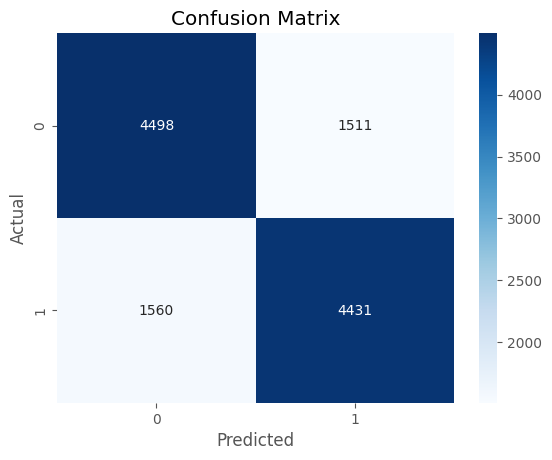

In [ ]:
# heatmap  of confusion matrix

cm = confusion_matrix(Y_test>0.5, y_pred>0.5)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

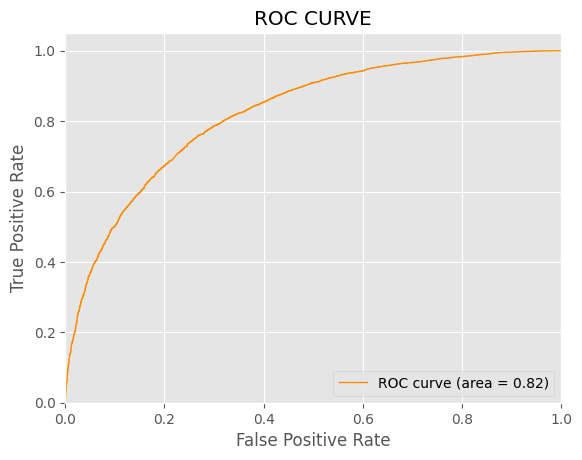

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

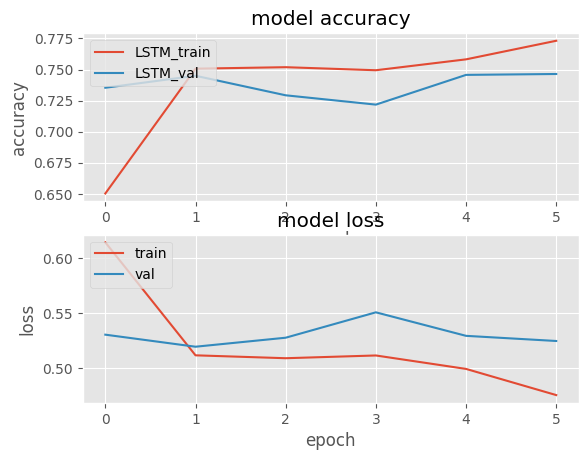

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'])
at.plot(history.history['val_accuracy'])
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'])
al.plot(history.history['val_loss'])
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')